In [120]:
import pandas as pd

df1 = pd.read_table("testing.csv", sep = ',')


array([6940., 6971., 6999., 7030., 7060., 7091., 7121., 7152., 7183.,
       7213., 7244., 7274., 7305., 7336., 7364., 7395., 7425., 7456.,
       7486., 7517., 7548., 7578., 7609., 7639., 7670., 7701., 7729.,
       7760., 7790., 7821., 7851., 7882., 7913., 7943., 7974., 8004.,
       8035., 8066., 8095., 8126., 8156., 8187., 8217., 8248., 8279.,
       8309., 8340., 8370., 8401., 8432., 8460., 8491., 8521., 8552.,
       8582., 8613., 8644., 8674., 8705., 8735.])

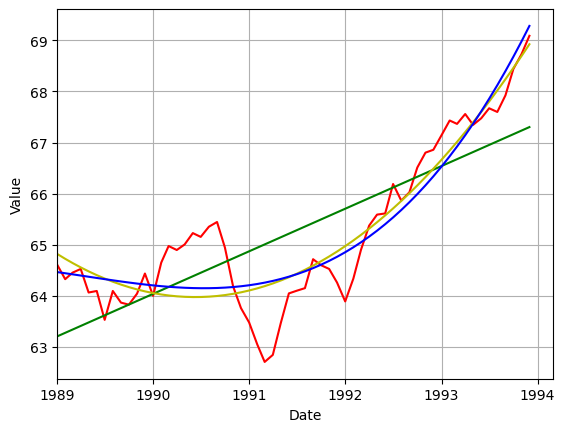

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Данные, которые будут отложены по оси Y
y = df1['Value'].values

# Преобразуем даты в числовой формат
x = df1['Date'].values
x_float = matplotlib.dates.date2num(x)

# Вызовем subplot явно, чтобы получить экземпляр класса AxesSubplot,
# из которого будем иметь доступ к осям
axes = plt.subplot(1, 1, 1)

#Подкорректируем оси
axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
axes.set_xlabel('Date')
axes.set_ylabel('Value')

# Отобразим данные
plt.plot_date(x_float, y, fmt="r-", label = 'true_data')

# Изменим левую границу
plt.xlim(xmin=matplotlib.dates.date2num(date(1989, 1, 1)))
plt.grid()



#Отобразим предсказанные значения в виде полинома первой степени
plm = np.polyfit(x_float, y, 1)#Находим коэфициента полинома

x_plm_deg_1 = np.linspace(6940, 8735, 60)#значения 6940 и 8735 появились во время перевода данных из типа date в тип float
y_plm_deg_1 = x_plm_deg_1*plm[0] + plm[1]

plt.plot(x_plm_deg_1, y_plm_deg_1, color = 'g', label = 'Полином степени 1')



#Отобразим предсказанные значения в виде полинома второй степени
plm = np.polyfit(x_float, y, 2)#Находим коэфициента полинома

x_plm_deg_2 = np.linspace(6940, 8735, 60)
y_plm_deg_2 = (x_plm_deg_2**2)*plm[0] + x_plm_deg_2*plm[1] + plm[2]

plt.plot(x_plm_deg_2, y_plm_deg_2, color = 'y', label = 'Полином степени 2')



#Отобразим предсказанные значения в виде полинома третьей степени
plm = np.polyfit(x_float, y, 3)#Находим коэфициента полинома

x_plm_deg_3 = np.linspace(6940, 8735, 60)
y_plm_deg_3 = (x_plm_deg_3**3)*plm[0] + (x_plm_deg_3**2)*plm[1] + x_plm_deg_3*plm[2] + plm[3]

plt.plot(x_plm_deg_3, y_plm_deg_3, color = 'b', label = 'Полином степени 3')

plt.show()

In [127]:
#Проверка качества полиномиальных предсказаний
from sklearn.metrics import r2_score

#Функция 'r2_score' получает на вход 2 массива: массив настоящих значений и предсказанных - и на выходе дайт оценку, максимальное значение которой '1'. По ней мы узнаем качество наших предсказаний
print("Качество предсказаний полинома со степенью 1" ,r2_score(y, y_plm_deg_1))
print("Качество предсказаний полинома со степенью 2" ,r2_score(y, y_plm_deg_2))
print("Качество предсказаний полинома со степенью 3" ,r2_score(y, y_plm_deg_3))

Функция 'r2_score' получает на вход 2 массива: массив настоящих значений и предсказанных - и на выходе дайт оценку, максимальное значение которой '1'. По ней мы узнаем качество наших предсказаний
Качество предсказаний полинома со степенью 1 0.5974393953759392
Качество предсказаний полинома со степенью 2 0.8372260274928542
Качество предсказаний полинома со степенью 3 0.8465030163605001


In [ ]:
#Как мы видим самое лучшее качество у полинома третей степени и самое худшее у линейного предсказания, причём и тремий второй полиномы
#имеют достаточно хорошое качество оценки, в то время как первый очень сильно от них отстаёт, но и он имеет не худшее качество для наших данных,
#ведь минимальная оценка качества может уходить и в минус, а у него она состовляет практически 0.6